<a href="https://colab.research.google.com/github/Olhaau/fl-official-statistics-addon/blob/main/_dev/04_insurance_wrapup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance - a Federated Learning Use Case.

Revision by Destatis (Julius Weißmann and Oliver Hauke)

## Summary
---

- We stablized the centralized deep neural network (DNN)
  - model with more units and layers, without dropout, Xavier Initializion
  - more robust, faster and precise results
- We fixed the Federated Learning (FL) Algorithm
  - same model as in the centralized setting
  - great improvement in loss, MAE similiar to centralized setting
- outline
  - FL highly suitable for the available data
  - suggestions:
    - fixed train/val/test-split for centralized vs federated
    - cross validation
    - tests for 5 or 9 features

## Initial Results
---

### Centralized

*Training Performance after tuning:*
![](https://github.com/Olhaau/fl-official-statistics-addon/blob/main/original_work/med-insurance/rsquared_hyperparams.jpg?raw=1)




### Federated

S. 
https://github.com/joshua-stock/fl-official-statistics/blob/main/med-insurance/med-insurance-federated.ipynb

- "*Ergebnisse sehen deutlich schlechter aus als zentralisiert.*"
- "*MAE geht nicht unter ~8700 (vs. ~2900 im zentralisierten Modell)*"
- "*R² ist negativ!*"

## Setup
---

In [1]:
# Is a repo-clone and installs needed (e.g. in colabs)? 
need_clone_install = True

### Pull Repo

In [2]:
if need_clone_install:
    import os
    
    # rm repo from gdrive
    if os.path.exists("fl-official-statistics-addon"):
      %rm -r fl-official-statistics-addon

    # clone
    !git clone https://github.com/Olhaau/fl-official-statistics-addon
    %cd fl-official-statistics-addon

    # pull (the currenct version of the repo)
    !git pull

Cloning into 'fl-official-statistics-addon'...
remote: Enumerating objects: 873, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 873 (delta 36), reused 15 (delta 10), pack-reused 818
Receiving objects: 100% (873/873), 33.20 MiB | 11.67 MiB/s, done.
Resolving deltas: 100% (396/396), done.
/content/fl-official-statistics-addon
Already up to date.


### Installs

#### Python Version

In [16]:
#https://www.datasciencelearner.com/change-python-version-in-google-colab-steps/
if False:
  !python --version
  print("-----------------------------------------------------------")
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
  !sudo update-alternatives --config python3
  print("-----------------------------------------------------------")
  !python --version

Python 3.8.10
There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
  0            /usr/bin/python3.8   1         auto mode
* 1            /usr/bin/python3.8   1         manual mode
  2            /usr/bin/python3.9   1         manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/bin/python3.9 to provide /usr/bin/python3 (python3) in manual mode
Python 3.9.16


#### Packages

In [3]:
if need_clone_install:
  #!pip install --quiet nest-asyncio==1.5.6
  #!pip install --quiet tensorflow==2.11.*
  !pip install --quiet tensorflow-federated==0.48.*
  !pip install --quiet tensorflow-addons==0.19.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.8/243.8 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 KB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 KB 18.4 MB/s et

In [18]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.0.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         21.4.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    3.1.1
catalogue                     2.0.8
certifi     

### Imports

In [4]:
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score

# DNN
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, ReLU
from tensorflow_addons.metrics import RSquare

# TFF
import tensorflow_federated as tff

### Visualizations for neural networks

(optional)

In [19]:
!pip install --quiet keras_visualizer==3.1.1 
from keras_visualizer import visualizer
from IPython.display import Image

## Ingest Data
---

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Olhaau/fl-official-statistics-addon/main/output/data/insurance-clean.csv", index_col = 0)
df.head()

age  sex       bmi  children  smoker     region      charges  region0  \
0  0.021739  0.0  0.321227       0.0     1.0  southwest  16884.92400      0.0   
1  0.000000  1.0  0.479150       0.2     0.0  southeast   1725.55230      0.0   
2  0.217391  1.0  0.458434       0.6     0.0  southeast   4449.46200      0.0   
3  0.326087  1.0  0.181464       0.0     0.0  northwest  21984.47061      0.0   
4  0.304348  1.0  0.347592       0.0     0.0  northwest   3866.85520      0.0   

   region1  region2  region3  
0      0.0      0.0      1.0  
1      0.0      1.0      0.0  
2      0.0      1.0      0.0  
3      1.0      0.0      0.0  
4      1.0      0.0      0.0

### Train Test Split

In [8]:
# Divide data into train and test data
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region0', 'region1', 'region2', 'region3']
target = 'charges'

df_ml = df[features + [target]]

X_train, X_test, y_train, y_test = train_test_split(
    df_ml[features], df_ml[[target]], 
    test_size = 0.2, random_state = 42, shuffle = True)

## Centralized Neural Networks
---

### Initial Model

See section 'DNN' from https://github.com/joshua-stock/fl-official-statistics/blob/main/med-insurance/med-insurance.ipynb

#### Define + Compile

In [30]:
# alternatively ...
#model0 = Sequential()
#model0.add(Dense(32, input_dim = 9))
#model0.add(ReLU())
#model0.add(Dropout(0.05))
#model0.add(Dense(16))
#model0.add(ReLU())
#model0.add(Dense(1))

model0 = Sequential([
    keras.Input(shape=(9,)),
    Dense(32, activation='relu'),
    Dropout(0.05),
    Dense(16, activation='relu'),
    Dense(1)
])

model0.compile(
    loss        = 'mae', 
    optimizer   = tf.optimizers.SGD(),
    metrics     = ["mae", 'mean_squared_error', r2_score], 
    run_eagerly = True
    )

model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


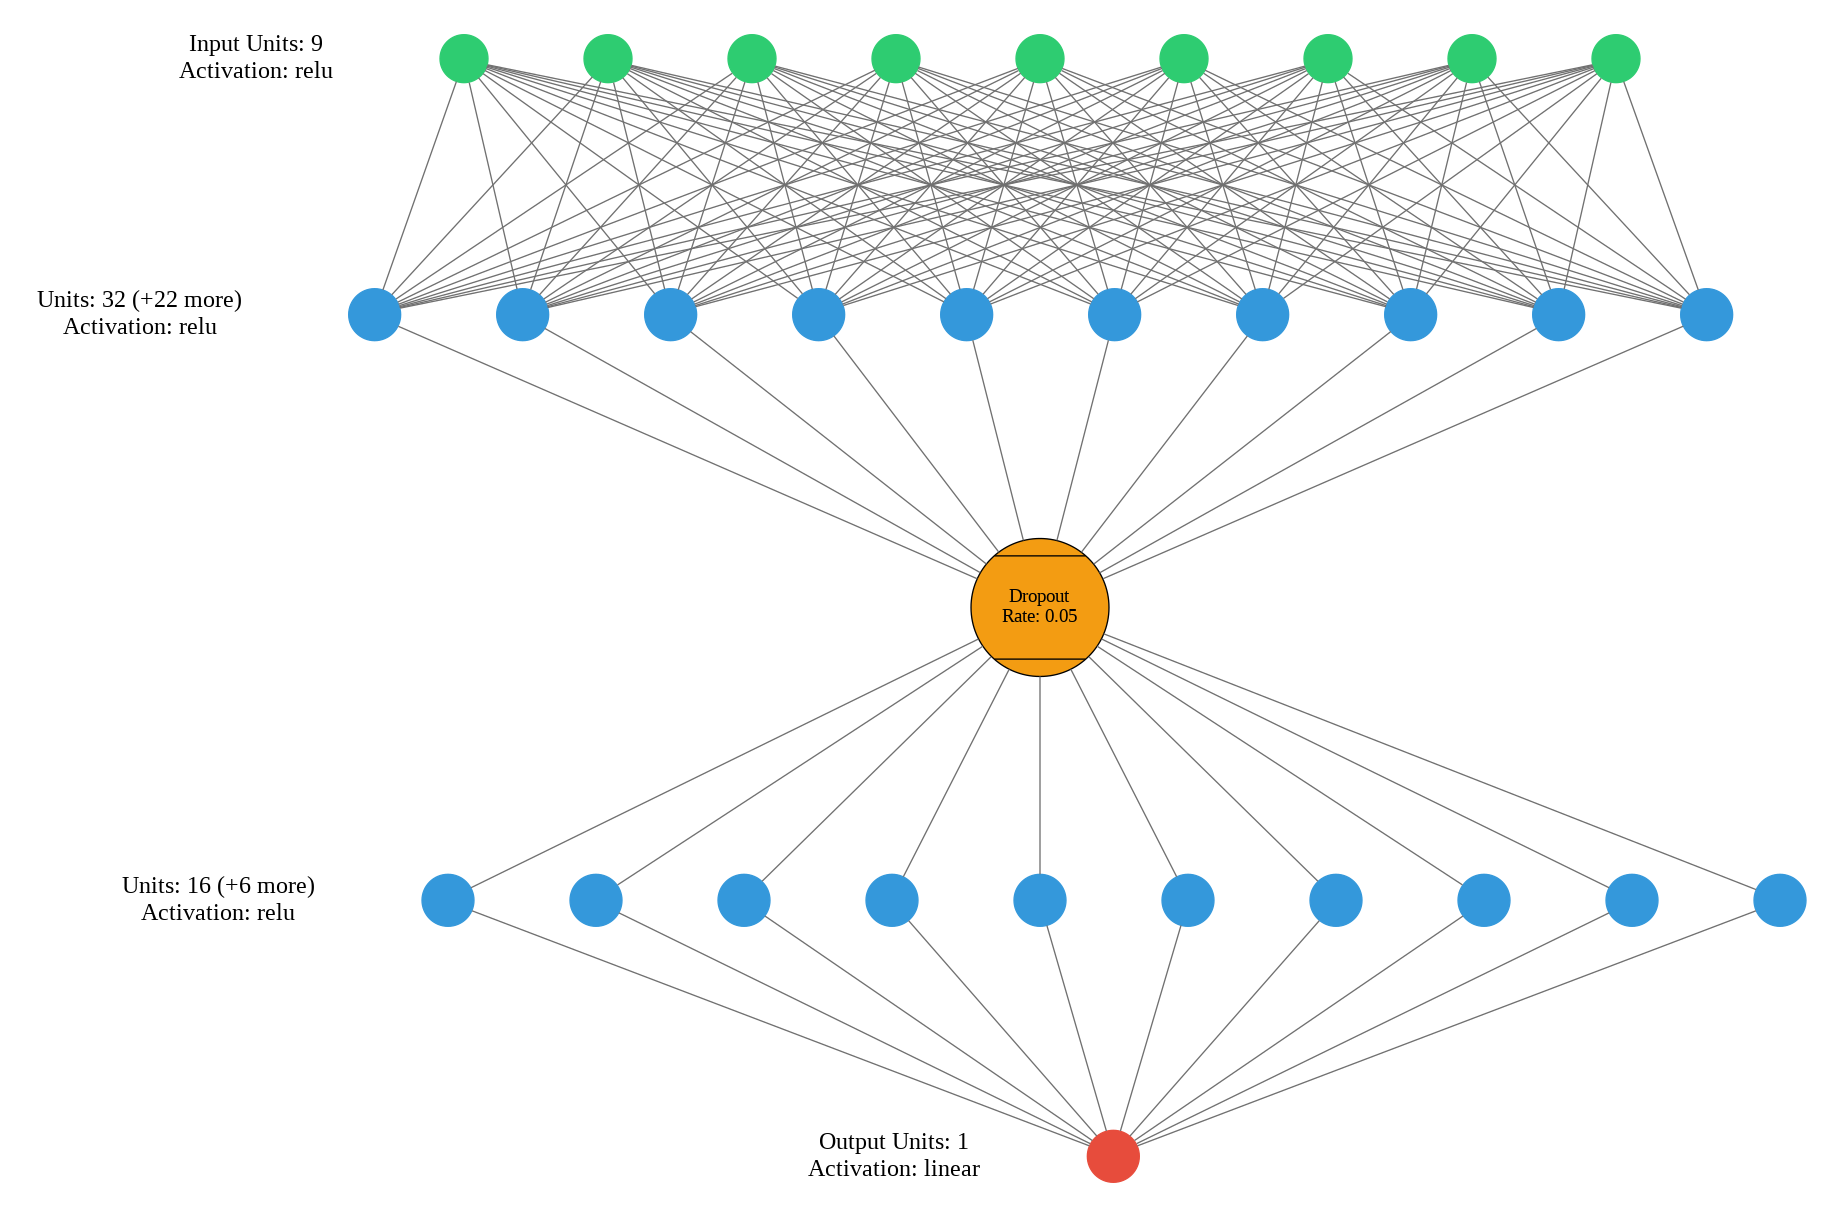

In [23]:
visualizer(model0, file_format = 'png', file_name = '_initial_model', view=True)
Image('_initial_model.png')

#### Train

In [ ]:
rtime = time.time() 
tf.random.set_seed(42)

with tf.device('/device:GPU:0'):
  hist0 = model0.fit(
      X_train, y_train,
      shuffle = True,
      validation_split = 0.2,
      epochs = 100,
      verbose = 0
  )

rtime = time.time() - rtime
print(rtime / 60)

#### Evaluate

In [ ]:
def plot_loss(hist, msr = 'loss'):
  """Plot the training history and save the figure.
  :param hist: The history object including the metrics to plot
  :type hist: keras.callbacks.History
  :param msr: The metrics to plot
  :type msr: str, optional
  """
  plt.plot(hist.history[msr])
  plt.plot(hist.history['val_' + msr])
  plt.ylabel(msr)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')


plot_loss(hist0, 'r2_score')
plt.title('Initial Model')
plt.ylim([-1, 0.9])
plt.show()
#fig = plt.figure()
#fig.savefig(plot_experiment_path + "/40_40_20_mse_adam_0_05_ReLU_bs256.png", dpi=fig.dpi)

In [68]:
# Test
pd.DataFrame({
    'measure': ["mae", 'mse', 'r2_score'],
    'value': hist0.model.evaluate(X_test, y_test, verbose = 0)[1:]
})

measure         value
0       mae  9.683215e+03
1       mse  1.556015e+08
2  r2_score -3.070631e-02

### Improved Model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                400       
                                                                 
 re_lu_13 (ReLU)             (None, 40)                0         
                                                                 
 dense_24 (Dense)            (None, 40)                1640      
                                                                 
 re_lu_14 (ReLU)             (None, 40)                0         
                                                                 
 dense_25 (Dense)            (None, 20)                820       
                                                                 
 re_lu_15 (ReLU)             (None, 20)                0         
                                                                 
 dense_26 (Dense)            (None, 1)               

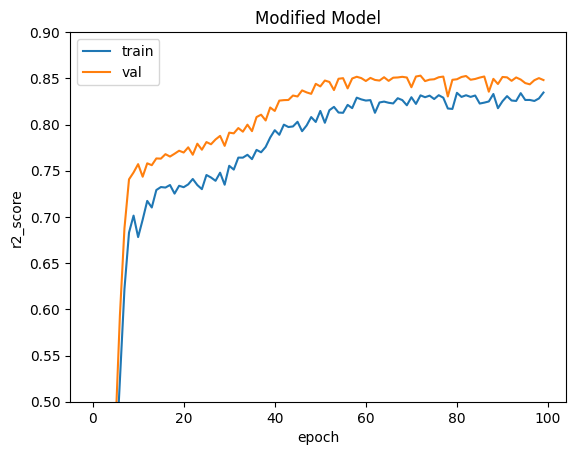

-- Test Performance --


measure         value
0       mae  2.689693e+03
1       mse  2.016260e+07
2  r2_score  8.543426e-01

In [75]:
# define + compile
model = Sequential()
model.add(Dense(40, input_dim = 9))
model.add(ReLU())
model.add(Dense(40))
model.add(ReLU())
model.add(Dense(20))
model.add(ReLU())
model.add(Dense(1))
# removed dropout, increased units and added another big layer in the middle

model.compile(
      loss = 'mean_squared_error', 
      optimizer = tf.optimizers.Adam(learning_rate = .05),
      # Adam + lower learning rate
      metrics = ["mae", 'mean_squared_error', r2_score], 
      run_eagerly = True
      )

model.summary()
print("=================================================================")

# train
rtime = time.time() 
tf.random.set_seed(42)

with tf.device('/device:GPU:0'):
  hist = model.fit(
      X_train, y_train,
      batch_size = 128, # <- higher batch_size
      shuffle = True,
      validation_split = 0.2,
      epochs = 100,
      verbose = 0
  )

rtime = time.time() - rtime
print('-- Training --')
print('time to train: ', rtime / 60)
print("=================================================================")

# evaluate
plot_loss(hist, 'r2_score')
plt.title('Modified Model')
plt.ylim([0.5, 0.9])
plt.show()
#fig = plt.figure()
#fig.savefig(plot_experiment_path + "/40_40_20_mse_adam_0_05_ReLU_bs256.png", dpi=fig.dpi)

# Test
print("=================================================================")
print("-- Test Performance --")
pd.DataFrame({
    'measure': ["mae", 'mse', 'r2_score'],
    'value': hist.model.evaluate(X_test, y_test, verbose = 0)[1:]
})

## Federated Learning
---

### Setup

### FedAvg